# Credit card detection using Federated Learning

In [1]:
!pip install --upgrade tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
INFO: pip is looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━

# Data Preparation

## Load data

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/tmp/ipykernel_17/827292369.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Class']).plot.bar()


Class
0    284315
1       492
Name: count, dtype: int64

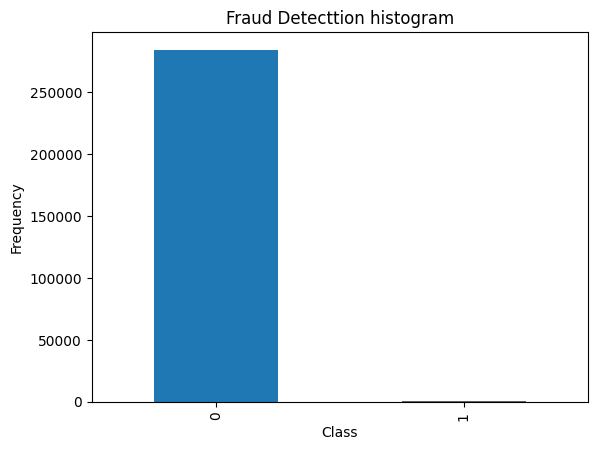

In [5]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud Detecttion histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [6]:
X = data.drop('Class', axis=1)
y = data['Class']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 30)
Shape of y: (284807,)


## Preprocess
### Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (227845, 30)
y_train:  (227845,)
X_test:  (56962, 30)
y_test:  (56962,)


In [8]:
unique, counts = np.unique(y_train, return_counts=True)
counts[1] / counts[0]

0.0017322412299792043

In [9]:
unique, counts = np.unique(y_test, return_counts=True)
counts[1] / counts[0]

0.0017234102419808666

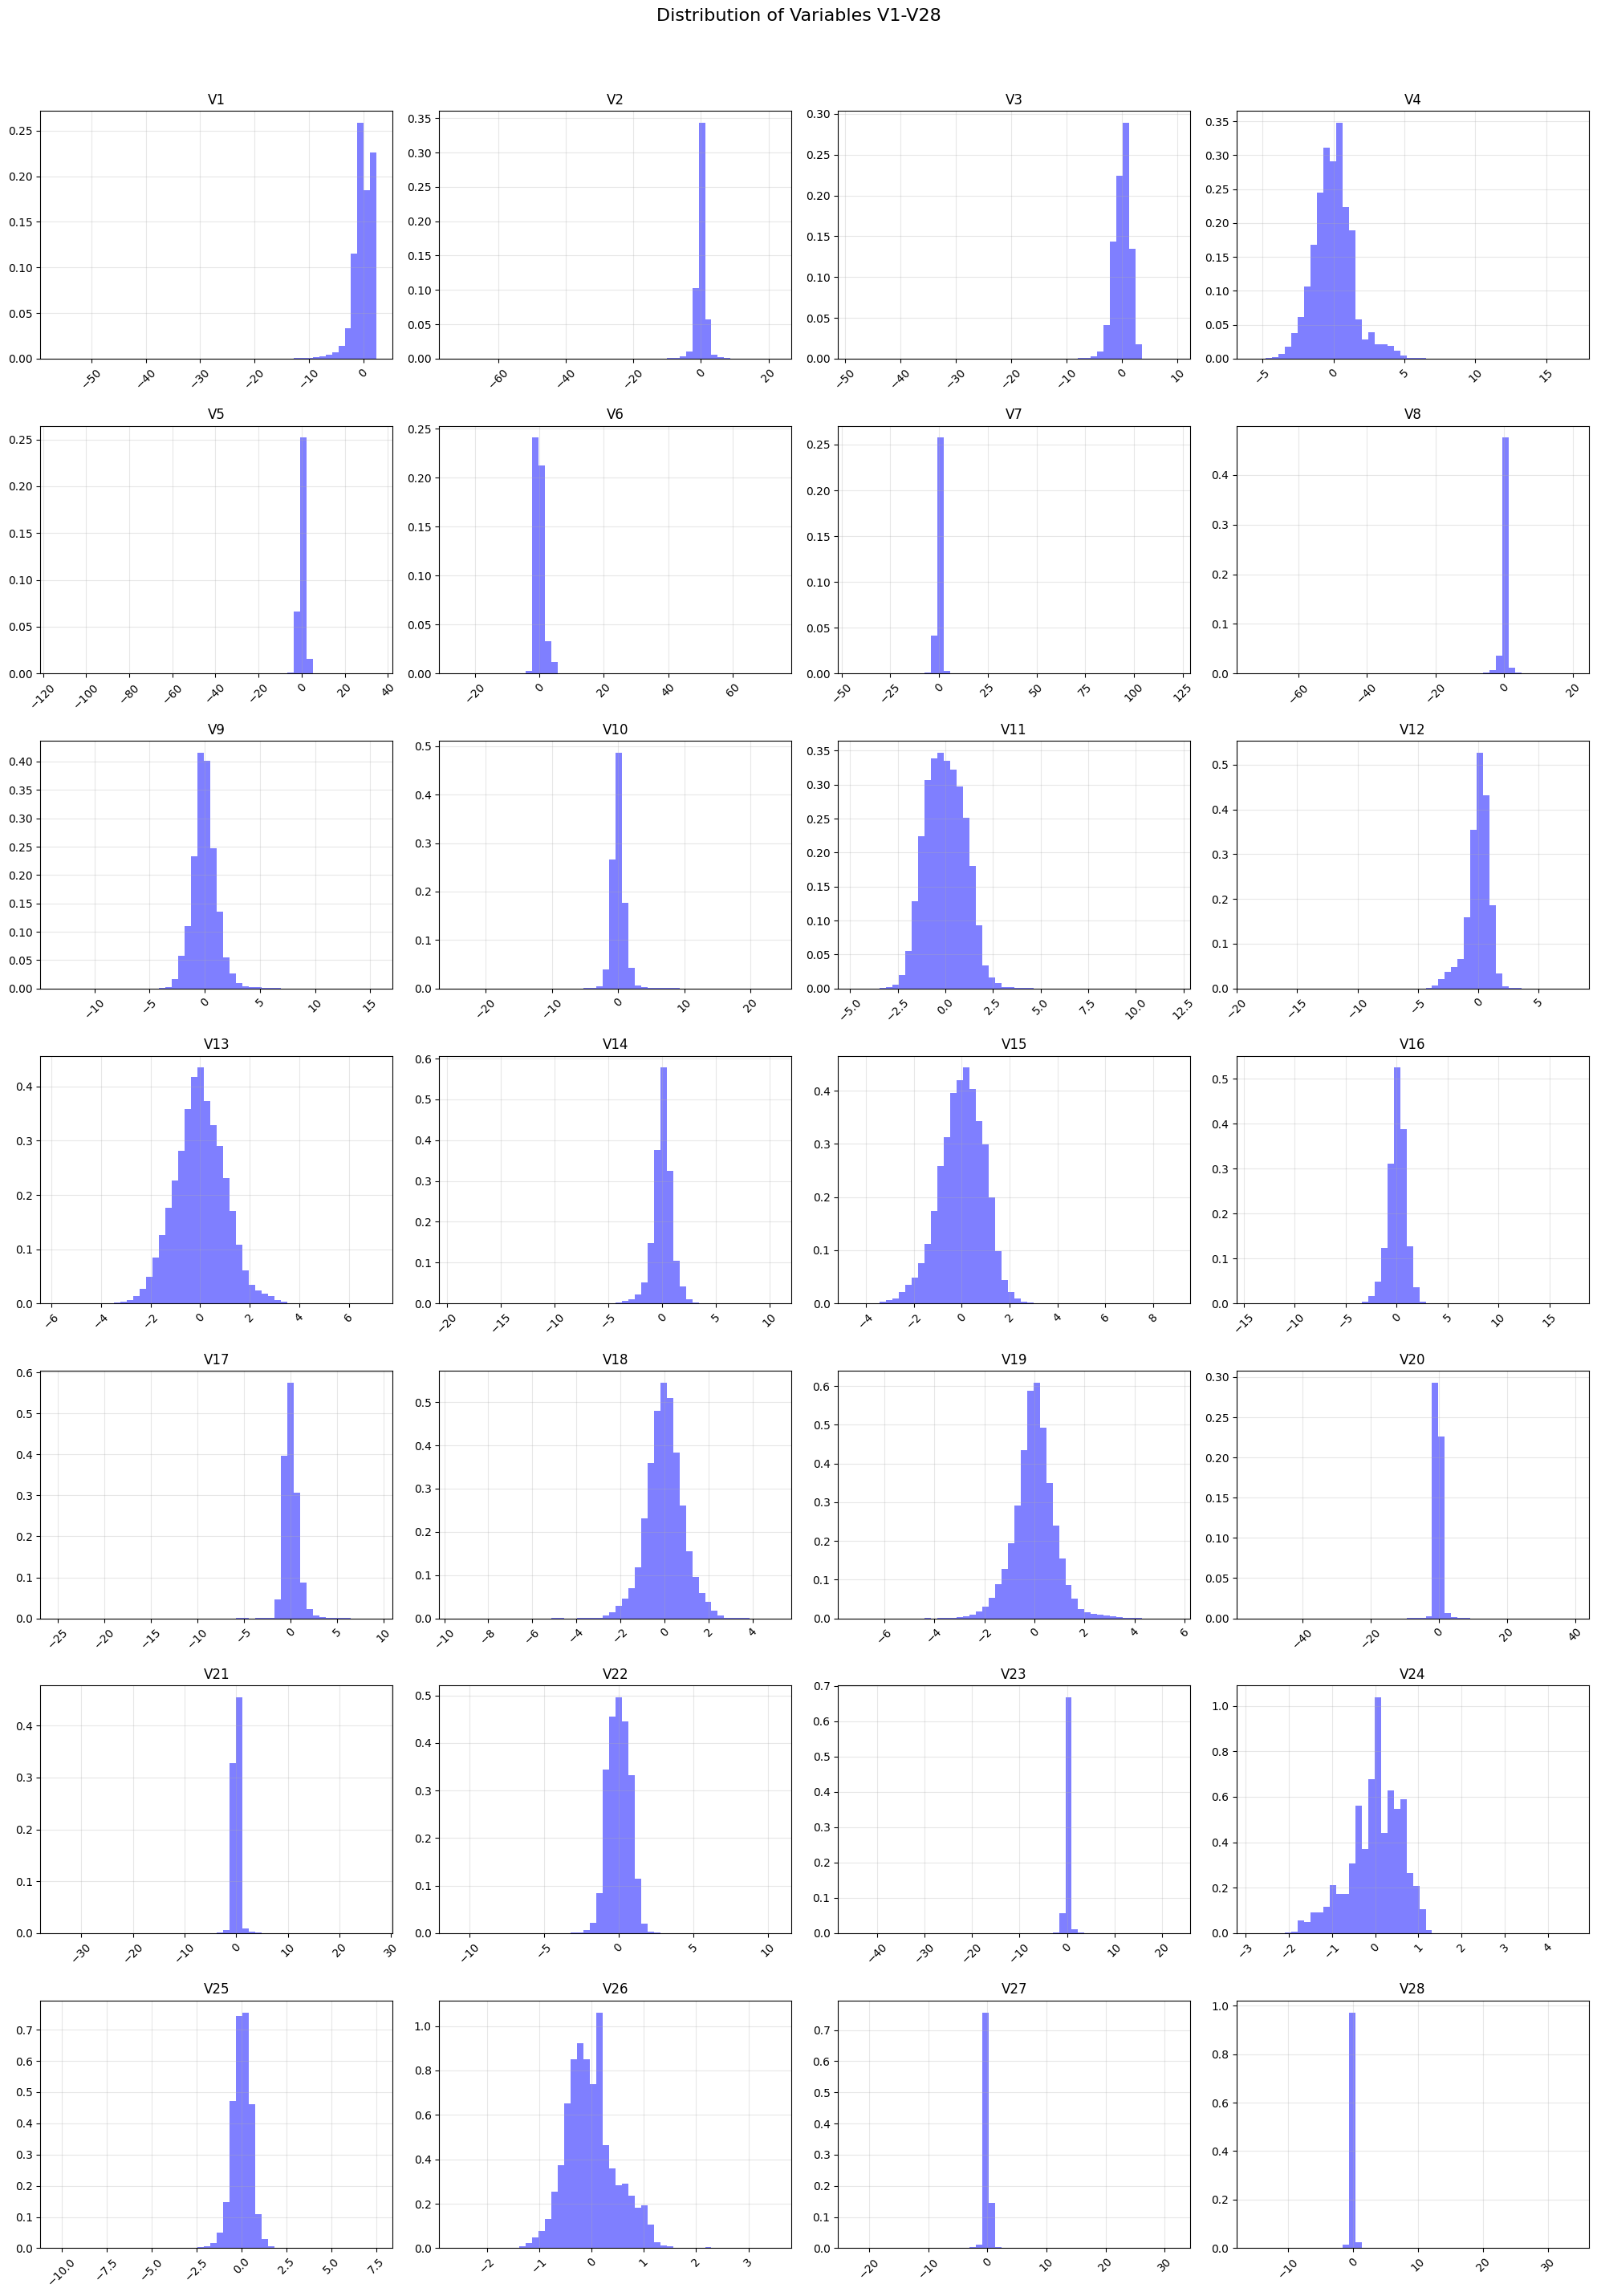

In [10]:
n_rows = 7
n_cols = 4

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 28))
fig.suptitle('Distribution of Variables V1-V28', fontsize=16, y=1.02)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot distribution for each variable
for i in range(28):
    # Get current axis
    ax = axes[i]
    
    ax.hist(data[f'V{i+1}'], bins=50, alpha=0.5, color='blue', density=True)
    
    # Set title for each subplot
    ax.set_title(f'V{i+1}')
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)
    
    # Add grid
    ax.grid(True, alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

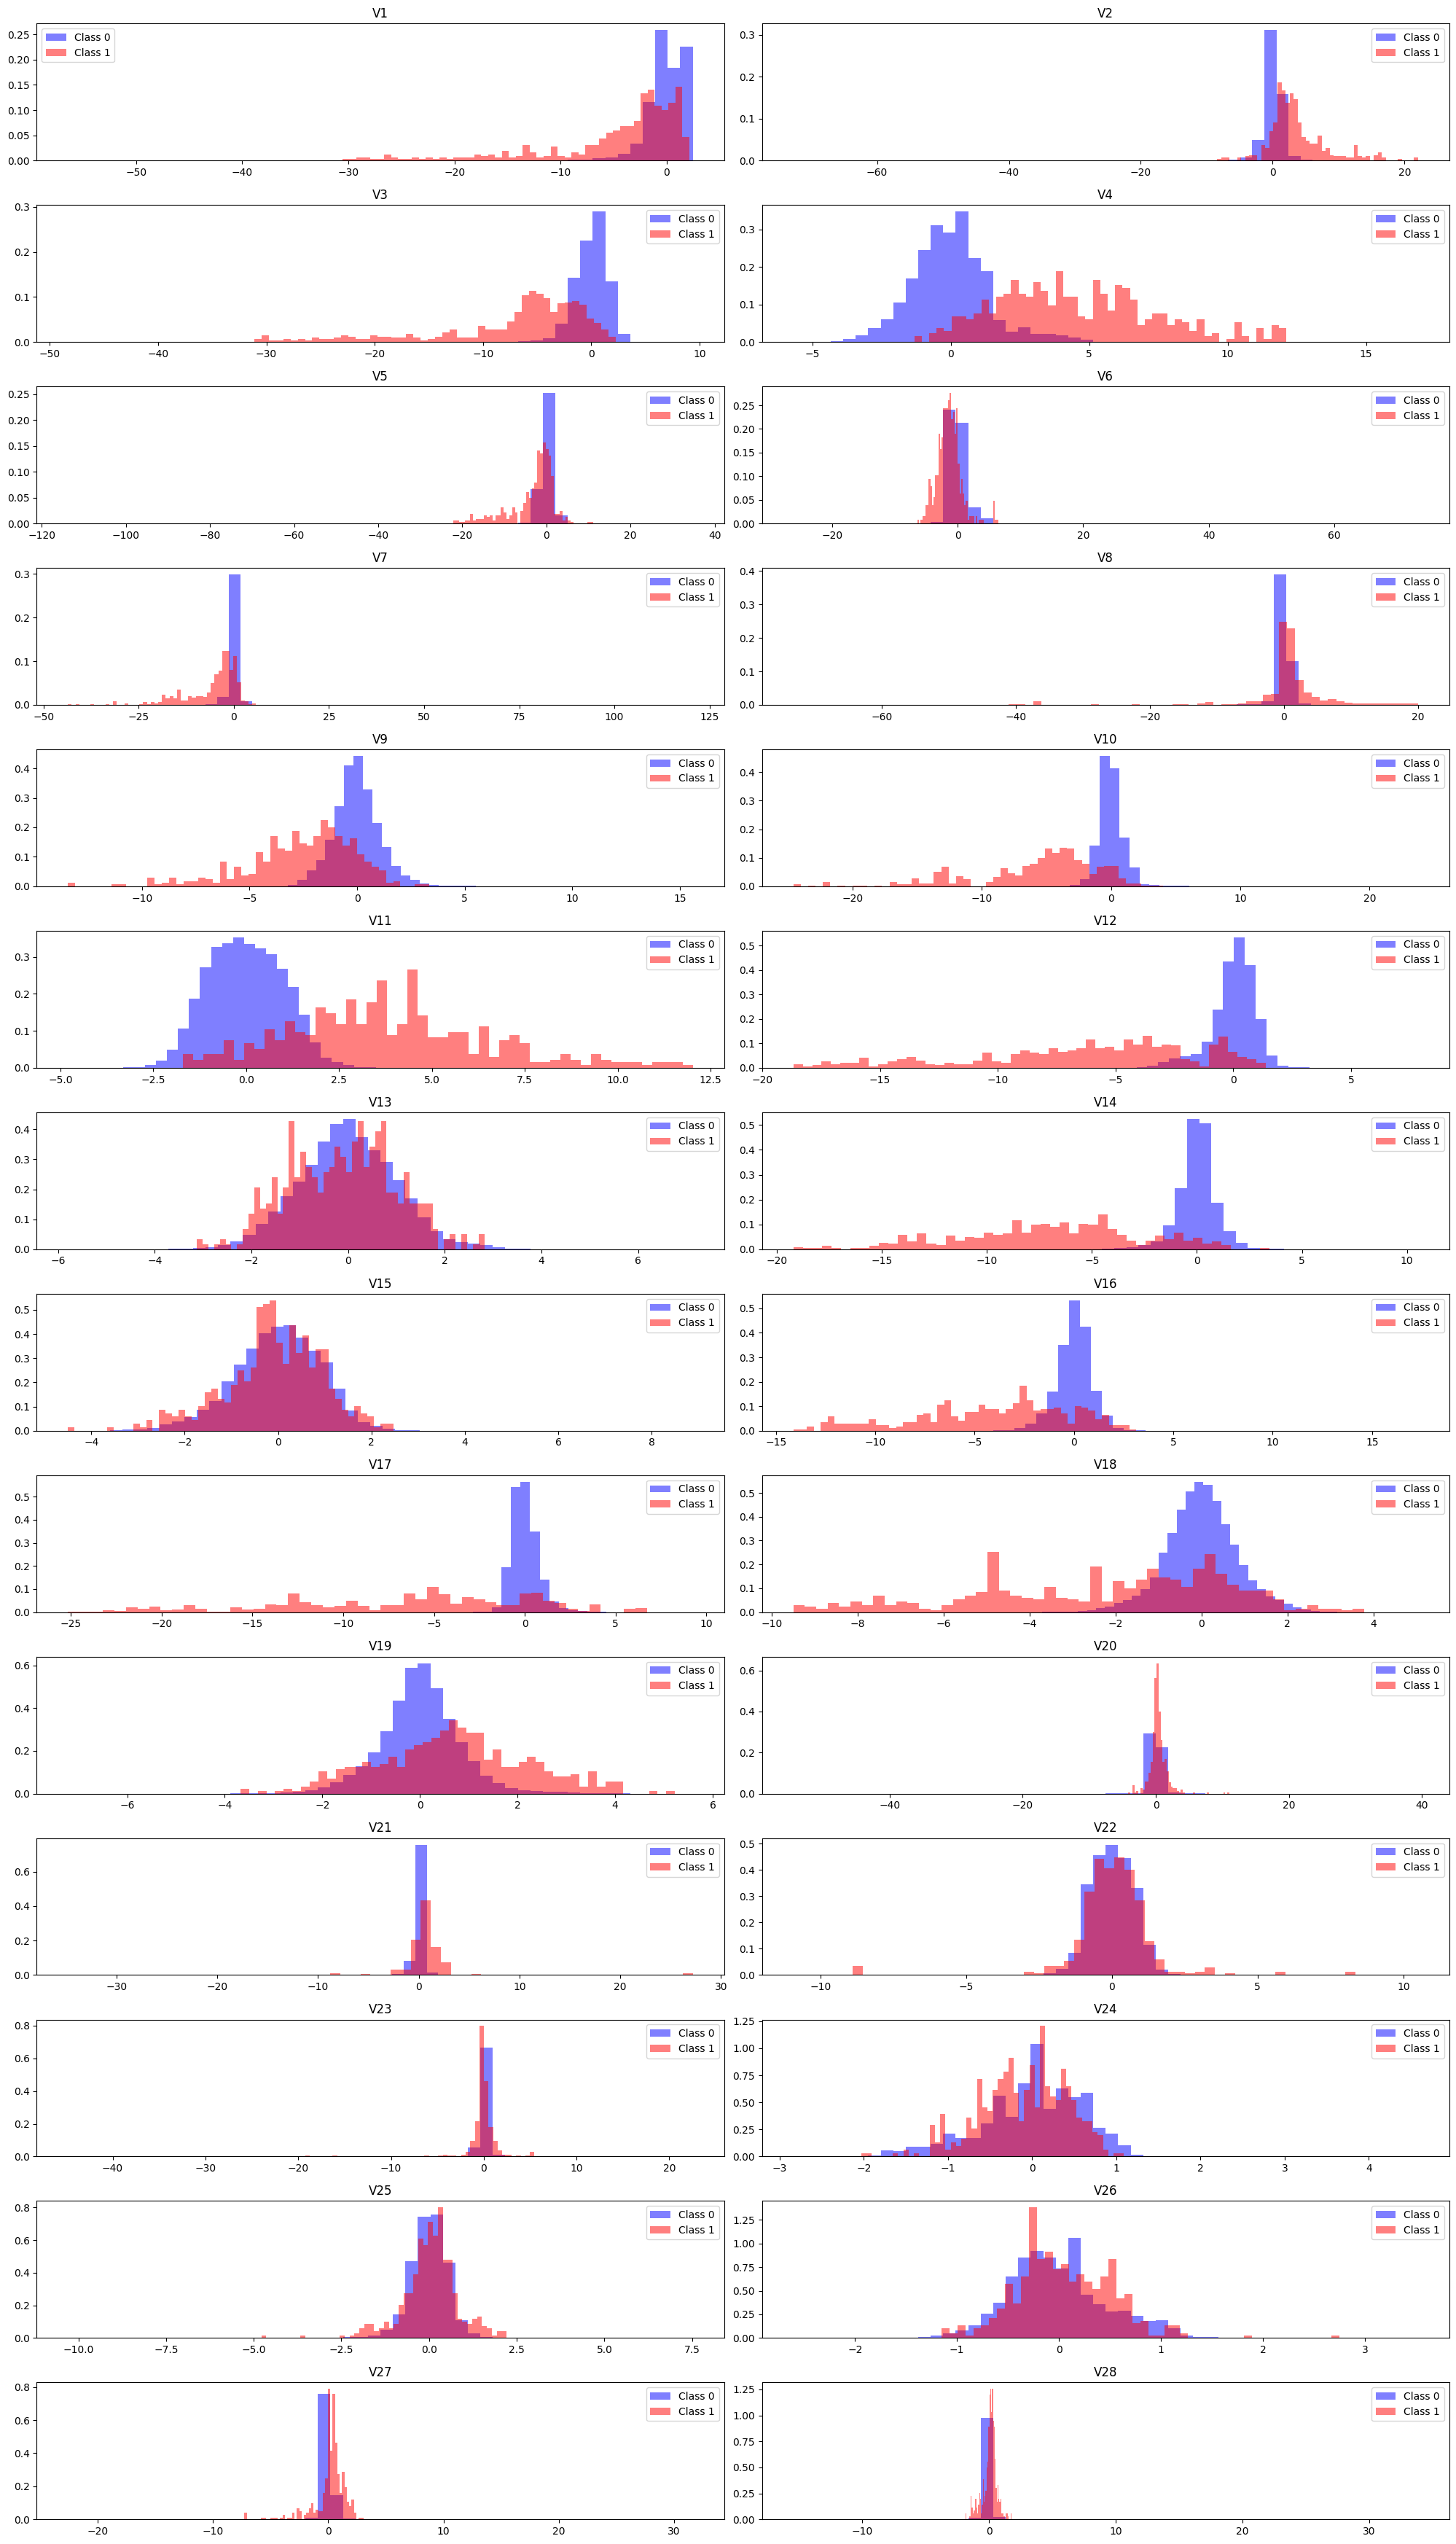

In [11]:
# Create a figure
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(20, 35))

for i in range(28):  # Assuming 'Class' is the last column
    row = i // 2  # get row index (integer division)
    col = i % 2   # get column index (remainder)
    
    ax = axes[row, col]  # Get the correct subplot
    column = f'V{i + 1}'
    # Plot histograms for each class
    ax.hist(data[data.Class == 0][column], bins=50, alpha=0.5, 
            label='Class 0', color='blue', density=True)
    ax.hist(data[data.Class == 1][column], bins=50, alpha=0.5, 
            label='Class 1', color='red', density=True)
    
    ax.set_title(column)
    ax.legend()
    ax.set_xlabel('')  # Remove x-label to avoid crowding

plt.tight_layout()
plt.show()

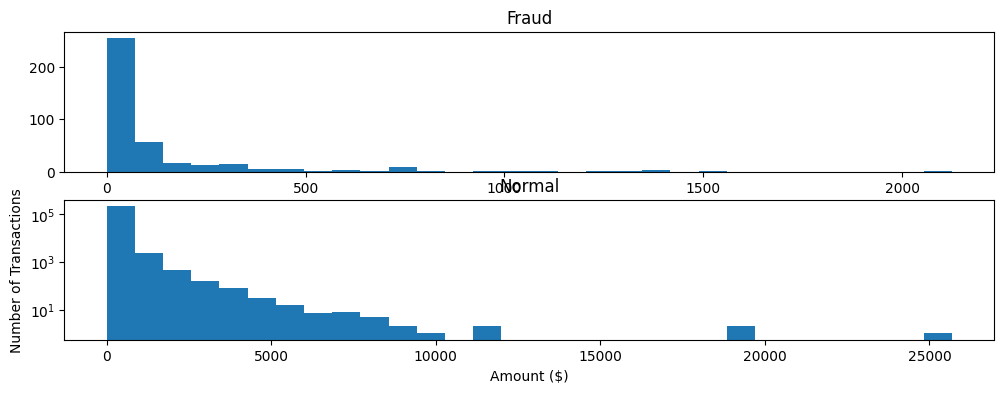

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(12,4))

bins = 30

ax1.hist(X_train.Amount[y_train == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(X_train.Amount[y_train == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

## Split datasets

In [13]:
import tensorflow as tf
import tensorflow_federated as tff
from typing import Tuple, OrderedDict
import collections

2024-12-05 15:25:54.854909: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 15:25:54.855010: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 15:25:54.855071: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
def split_data_for_clients(X, y, n_clients=5):
    """Split data into client datasets and return pair of df"""
    client_datasets = []
    
    # Calculate samples per client
    n_samples = len(X)
    samples_per_client = n_samples // n_clients
    
    # Shuffle data
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X_shuffled = X.iloc[indices]
    y_shuffled = y.iloc[indices]
    
    # Create client datasets
    for i in range(n_clients):
        start_idx = i * samples_per_client
        end_idx = start_idx + samples_per_client if i < n_clients-1 else n_samples
        
        # Get client data
        X_client = X_shuffled.iloc[start_idx:end_idx].astype('float32')
        y_client = y_shuffled.iloc[start_idx:end_idx].astype('int32')  # Changed to int32

        client_datasets.append((X_client, y_client))
    
    return client_datasets


In [15]:
def convert_to_dataset(X_client, y_client, local_epochs=2, batch_size=32):
    X = X_client.values.astype('float32')
    y = y_client.values.astype('int32')
    dataset = tf.data.Dataset.from_tensor_slices(
        (
            X,
            y.reshape(-1)
        )
    )
    dataset = dataset.shuffle(len(y_client))
    dataset = dataset.repeat(local_epochs)
    dataset = dataset.batch(batch_size)

    return dataset

In [16]:
print("Creating client datasets...")
client_data = split_data_for_clients(
    X_train, 
    y_train, 
    n_clients=5
)

Creating client datasets...


In [17]:
print("\nVerifying client data:")
for i, (X, y) in enumerate(client_data):
    print(f'Client {i} data shapes:')
    print(f'features: {X.shape}')
    print(f'labels: {y.shape}')


Verifying client data:
Client 0 data shapes:
features: (45569, 30)
labels: (45569,)
Client 1 data shapes:
features: (45569, 30)
labels: (45569,)
Client 2 data shapes:
features: (45569, 30)
labels: (45569,)
Client 3 data shapes:
features: (45569, 30)
labels: (45569,)
Client 4 data shapes:
features: (45569, 30)
labels: (45569,)


### Feature Scaler
Perform StandardScaler on `Time` and `Amount`

In [18]:
def standard_scale(X, y):
    scaler = StandardScaler()
    time_amount_cols = ['Time', 'Amount']
    
    X_scaled = X.copy()
    X_scaled[time_amount_cols] = scaler.fit_transform(X[time_amount_cols])

    return (X_scaled, y)

In [19]:
scaled_client_datasets = [standard_scale(X, y) for X, y in client_data]

In [20]:
print("\nVerifying client datasets:")
for i, (X, y) in enumerate(scaled_client_datasets):
    print(f'Client {i} data shapes:')
    print(f'features: {X.shape}')
    print(f'labels: {y.shape}')


Verifying client datasets:
Client 0 data shapes:
features: (45569, 30)
labels: (45569,)
Client 1 data shapes:
features: (45569, 30)
labels: (45569,)
Client 2 data shapes:
features: (45569, 30)
labels: (45569,)
Client 3 data shapes:
features: (45569, 30)
labels: (45569,)
Client 4 data shapes:
features: (45569, 30)
labels: (45569,)


### Over-sampling

In [21]:
def oversample(X, y, minor_rate=0.005):
    smote = SMOTE(sampling_strategy=minor_rate, random_state=42)
    X_os, y_os = smote.fit_resample(X, y)
    
    # Print shapes to verify the results
    print("Training set shape before SMOTE:", X.shape)
    print("Training set shape after SMOTE:", X_os.shape)
    
    # Print class distribution
    print("\nClass distribution in original training set:")
    print(y.value_counts())
    print("\nClass distribution in balanced training set:")
    print(y_os.value_counts())

    return (X_os, y_os)

In [22]:
os_client_datasets = [oversample(X, y) for X, y in scaled_client_datasets]

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79b05dc1cb80>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /opt/conda/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


Training set shape before SMOTE: (45569, 30)
Training set shape after SMOTE: (45713, 30)

Class distribution in original training set:
Class
0    45486
1       83
Name: count, dtype: int64

Class distribution in balanced training set:
Class
0    45486
1      227
Name: count, dtype: int64
Training set shape before SMOTE: (45569, 30)
Training set shape after SMOTE: (45705, 30)

Class distribution in original training set:
Class
0    45478
1       91
Name: count, dtype: int64

Class distribution in balanced training set:
Class
0    45478
1      227
Name: count, dtype: int64
Training set shape before SMOTE: (45569, 30)
Training set shape after SMOTE: (45723, 30)

Class distribution in original training set:
Class
0    45496
1       73
Name: count, dtype: int64

Class distribution in balanced training set:
Class
0    45496
1      227
Name: count, dtype: int64
Training set shape before SMOTE: (45569, 30)
Training set shape after SMOTE: (45719, 30)

Class distribution in original training set

# Federated Learning

## Define model

In [23]:
def create_keras_model():
    return tf.keras.models.Sequential([
          tf.keras.layers.Dense(30, input_shape=(30, ), activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
      ])

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', thresholds=0.6, **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision(thresholds=thresholds)
        self.recall = tf.keras.metrics.Recall(thresholds=thresholds)

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()
        
def model_fn():
    keras_model = create_keras_model()
    
    # Define metrics that work with binary classification shapes
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.AUC(curve='PR', name='auprc'),
        tf.keras.metrics.AUC(name='auroc'),
        tf.keras.metrics.Precision(name="precision", thresholds=0.6),
        tf.keras.metrics.Recall(name="recall", thresholds=0.6),
        F1Score()
    ]
    
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=preprocessed_sample_dataset.element_spec,
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=metrics
    )


## Prepare train and test datasets

In [24]:
client_datasets = [convert_to_dataset(X, y) for X, y in os_client_datasets]

# Create a sample dataset for input specification
preprocessed_sample_dataset = client_datasets[0]

In [25]:
preprocessed_sample_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
X_test_scaled, y_test = standard_scale(X_test, y_test)
X_test_32 = X_test_scaled.values.astype('float32')  # Explicitly float32
y_test_32 = y_test.values.astype('int32')

In [27]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (X_test_32, y_test_32)
).batch(32)

test_datasets = [test_dataset]

## Training and evaluation loop

In [28]:
def train_and_evaluate(training_process, evaluation_process, client_datasets, test_datasets, num_rounds):
    """Perform federated training and evaluation."""
    # Initialize states
    train_state = training_process.initialize()
    evaluation_state = evaluation_process.initialize()
    
    # Lists to store metrics
    train_metrics_history = []
    eval_metrics_history = []
    
    print("Starting training and evaluation...")
    
    for round_num in range(num_rounds):
        # Training
        result = training_process.next(train_state, client_datasets)
        train_state = result.state
        train_metrics = result.metrics['client_work']['train']
        
        # Evaluation
        model_weights = training_process.get_model_weights(train_state)
        evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)
        eval_output = evaluation_process.next(evaluation_state, test_datasets)
        eval_metrics = eval_output.metrics['client_work']['eval']['current_round_metrics']
        
        # Store metrics
        train_metrics_history.append(train_metrics)
        eval_metrics_history.append(eval_metrics)
        
        # Print progress
        print(f'\nRound {round_num + 1}/{num_rounds}')
        print("\nTraining Metrics:")
        for name, value in train_metrics.items():
            if isinstance(value, (float, np.floating)):
                print(f'{name}: {value:.4f}')
        
        print("\nEvaluation Metrics:")
        for name, value in eval_metrics.items():
            if isinstance(value, (float, np.floating)):
                print(f'{name}: {value:.4f}')
        print('-' * 50)
    
    return train_metrics_history, eval_metrics_history, train_state

In [29]:
num_rounds = 5
training_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=tff.learning.optimizers.build_adam(learning_rate=0.0001))

evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

In [30]:
train_history, eval_history, train_state = train_and_evaluate(
    training_process, 
    evaluation_process,
    client_datasets, 
    test_datasets,
    num_rounds
)

Starting training and evaluation...

Round 1/5

Training Metrics:
accuracy: 0.9663
auprc: 0.2442
auroc: 0.7879
precision: 0.1929
recall: 0.3211
f1_score: 0.2410
loss: 0.1265

Evaluation Metrics:
accuracy: 0.9991
auprc: 0.5950
auroc: 0.8797
precision: 0.8088
recall: 0.5612
f1_score: 0.6627
loss: 0.0089
--------------------------------------------------

Round 2/5

Training Metrics:
accuracy: 0.9985
auprc: 0.7944
auroc: 0.9419
precision: 0.9549
recall: 0.6996
f1_score: 0.8075
loss: 0.0093

Evaluation Metrics:
accuracy: 0.9992
auprc: 0.6395
auroc: 0.9307
precision: 0.8313
recall: 0.7041
f1_score: 0.7624
loss: 0.0051
--------------------------------------------------

Round 3/5

Training Metrics:
accuracy: 0.9987
auprc: 0.8347
auroc: 0.9586
precision: 0.9550
recall: 0.7767
f1_score: 0.8567
loss: 0.0074

Evaluation Metrics:
accuracy: 0.9992
auprc: 0.6763
auroc: 0.9417
precision: 0.8046
recall: 0.7143
f1_score: 0.7568
loss: 0.0045
--------------------------------------------------

Round 4/5

## Plot the training and evaluation metrics

In [31]:
def track_metrics_and_plot(train_history, eval_history, num_rounds):
    """Plot training and evaluation metrics."""
    metrics_to_plot = ['accuracy', 'auprc', 'auroc', 'precision', 'recall', 'f1_score']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Training and Evaluation Metrics Progress')
    
    # Create x-axis values (rounds)
    rounds = list(range(1, num_rounds + 1))
    
    # Plot each metric
    for idx, metric_name in enumerate(metrics_to_plot):
        row = idx // 3
        col = idx % 3
        
        # Get the values for training and evaluation
        train_values = [metrics[metric_name] for metrics in train_history]
        eval_values = [metrics[metric_name] for metrics in eval_history]
        
        # Create the subplot
        ax = axes[row, col]
        ax.plot(rounds, train_values, label='Training', marker='o')
        ax.plot(rounds, eval_values, label='Evaluation', marker='s')
        ax.set_title(metric_name.upper())
        ax.set_xlabel('Round')
        ax.set_ylabel('Value')
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    return fig

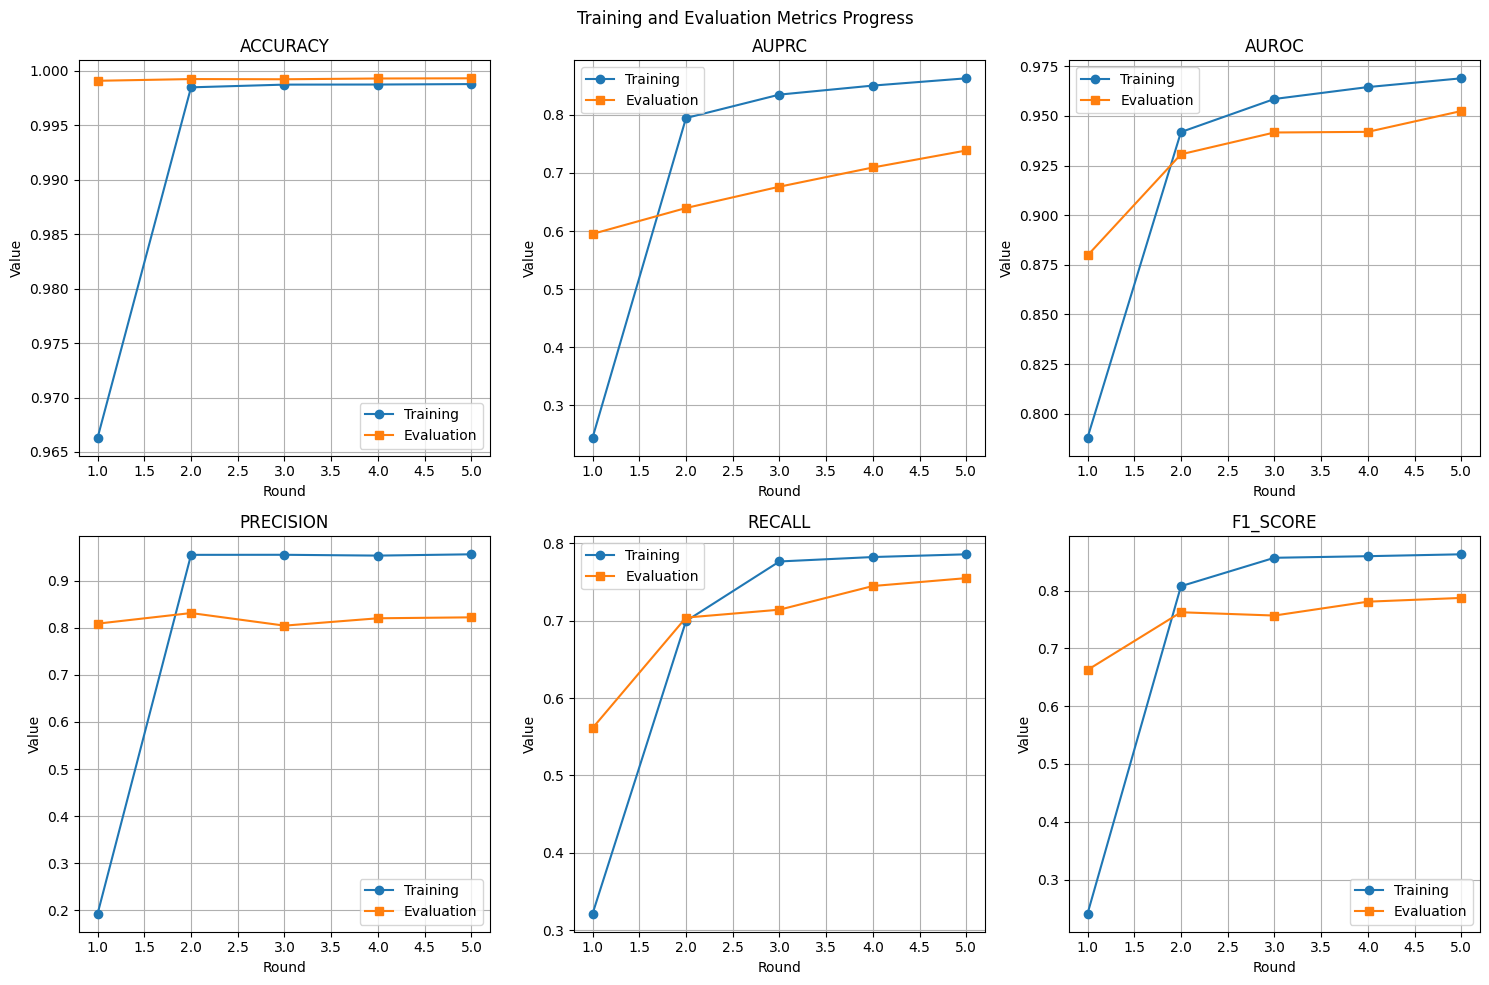

In [32]:
fig = track_metrics_and_plot(train_history, eval_history, num_rounds)
plt.show()

## Final evaluation on test set

In [33]:
evaluation_state = evaluation_process.initialize()
model_weights = training_process.get_model_weights(train_state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [34]:
evaluation_output = evaluation_process.next(evaluation_state, test_datasets)
evaluation_output.metrics

OrderedDict([('distributor', ()),
             ('client_work',
              OrderedDict([('eval',
                            OrderedDict([('current_round_metrics',
                                          OrderedDict([('accuracy', 0.9992978),
                                                       ('auprc', 0.73857),
                                                       ('auroc', 0.95248246),
                                                       ('precision',
                                                        0.82222223),
                                                       ('recall', 0.75510204),
                                                       ('f1_score', 0.787234),
                                                       ('loss', 0.003680026),
                                                       ('num_examples', 56962),
                                                       ('num_batches',
                                                        1781)])),
          